2024

Nairobi, Kenya 2024

Forecasting (FB Prophet)

In [86]:
import pandas as pd
df = pd.read_csv("Nairobi Kenya 2024.csv")
df = df[["datetimeLocal", "value"]]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the datetimeLocal column to pandas datetime format
df['datetimeLocal'] = pd.to_datetime(df['datetimeLocal'])

# Create separate Date and Time columns
df['Date'] = df['datetimeLocal'].dt.date
df['Time'] = df['datetimeLocal'].dt.time
date = df['Date']
time = df['Time']
# Print the resulting DataFrame
print(df[['Date', 'Time']])


            Date      Time
0     2024-03-01  04:00:00
1     2024-03-01  05:00:00
2     2024-03-01  06:00:00
3     2024-03-01  07:00:00
4     2024-03-01  08:00:00
...          ...       ...
2006  2024-05-30  22:00:00
2007  2024-05-30  23:00:00
2008  2024-05-31  00:00:00
2009  2024-05-31  02:00:00
2010  2024-05-31  03:00:00

[2011 rows x 2 columns]


In [87]:
#Combining 2 series to a pandas dataframe
date_time = pd.concat([date, time], axis = 1)
date_time.tail()

,Date,Time
2006,2024-05-30,22:00:00
2007,2024-05-30,23:00:00
2008,2024-05-31,00:00:00
2009,2024-05-31,02:00:00
2010,2024-05-31,03:00:00


In [88]:
date_time.shape

(2011, 2)

In [89]:
print(type(date))
print(type(time))
print(type(date_time))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [90]:
#Combining Date and Time
date_time['ds'] = date_time['Date'].astype(str) + ' ' + date_time['Time'].astype(str)
date_time.head()

,Date,Time,ds
0,2024-03-01,04:00:00,2024-03-01 04:00:00
1,2024-03-01,05:00:00,2024-03-01 05:00:00
2,2024-03-01,06:00:00,2024-03-01 06:00:00
3,2024-03-01,07:00:00,2024-03-01 07:00:00
4,2024-03-01,08:00:00,2024-03-01 08:00:00


In [91]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2011 non-null   object
 1   Time    2011 non-null   object
 2   ds      2011 non-null   object
dtypes: object(3)
memory usage: 47.3+ KB


In [92]:
#Convert ds from object to datetimeLike
# + np.array
data_df = pd.DataFrame()
data_df['ds'] = pd.to_datetime(date_time['ds'])
data_df.head()


,ds
0,2024-03-01 04:00:00
1,2024-03-01 05:00:00
2,2024-03-01 06:00:00
3,2024-03-01 07:00:00
4,2024-03-01 08:00:00


In [93]:
df.reset_index()
df.drop_duplicates()
df.head()

,datetimeLocal,value,Date,Time
0,2024-03-01 04:00:00+03:00,6.6,2024-03-01,04:00:00
1,2024-03-01 05:00:00+03:00,6.7,2024-03-01,05:00:00
2,2024-03-01 06:00:00+03:00,9.2,2024-03-01,06:00:00
3,2024-03-01 07:00:00+03:00,26.0,2024-03-01,07:00:00
4,2024-03-01 08:00:00+03:00,17.0,2024-03-01,08:00:00


In [95]:
data_df['y'] = df['value']
data_df.head()


,ds,y
0,2024-03-01 04:00:00,6.6
1,2024-03-01 05:00:00,6.7
2,2024-03-01 06:00:00,9.2
3,2024-03-01 07:00:00,26.0
4,2024-03-01 08:00:00,17.0


In [96]:
print(data_df.tail())  # Check the first few rows

                      ds      y
2006 2024-05-30 22:00:00  190.0
2007 2024-05-30 23:00:00  190.0
2008 2024-05-31 00:00:00  190.0
2009 2024-05-31 02:00:00  190.0
2010 2024-05-31 03:00:00  190.0


In [97]:
print(type(data_df))   # Verify that it's a DataFrame

<class 'pandas.core.frame.DataFrame'>


In [ ]:
pip install prophet

In [ ]:
pip install pystan~=2.14

In [98]:
from prophet import Prophet

#Train the model
model = Prophet()
model.fit(data_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurgqeg6v/ggzcfw_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurgqeg6v/7zxdgx3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56678', 'data', 'file=/tmp/tmpurgqeg6v/ggzcfw_2.json', 'init=/tmp/tmpurgqeg6v/7zxdgx3x.json', 'output', 'file=/tmp/tmpurgqeg6v/prophet_modeluvqx2ulf/prophet_model-20240726115646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:56:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:56:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [99]:
future_predict = model.make_future_dataframe(periods = 100, freq = 'h')
future_predict.tail()

,ds
2106,2024-06-04 03:00:00
2107,2024-06-04 04:00:00
2108,2024-06-04 05:00:00
2109,2024-06-04 06:00:00
2110,2024-06-04 07:00:00


In [100]:
forecast = model.predict(future_predict)
forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']]
forecast.loc[:, ['ds', 'yhat', 'yhat_lower', 'yhat_upper']] = np.array(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2106,2024-06-04 03:00:00,203.332658,183.266334,228.757379,201.759078,204.709559,2.115780,2.115780,2.115780,4.417110,4.417110,4.417110,-2.301330,-2.301330,-2.301330,0.0,0.0,0.0,205.448438
2107,2024-06-04 04:00:00,203.454035,182.489759,227.309181,201.845554,204.858271,1.912484,1.912484,1.912484,4.232403,4.232403,4.232403,-2.319920,-2.319920,-2.319920,0.0,0.0,0.0,205.366519
2108,2024-06-04 05:00:00,203.575412,184.177585,229.824927,201.940246,205.010830,3.773696,3.773696,3.773696,6.116303,6.116303,6.116303,-2.342607,-2.342607,-2.342607,0.0,0.0,0.0,207.349108
2109,2024-06-04 06:00:00,203.696789,189.247294,234.976240,202.043917,205.149892,7.448681,7.448681,7.448681,9.818319,9.818319,9.818319,-2.369638,-2.369638,-2.369638,0.0,0.0,0.0,211.145470
2110,2024-06-04 07:00:00,203.818166,192.149031,235.368890,202.129014,205.292933,11.031878,11.031878,11.031878,13.433036,13.433036,13.433036,-2.401158,-2.401158,-2.401158,0.0,0.0,0.0,214.850044


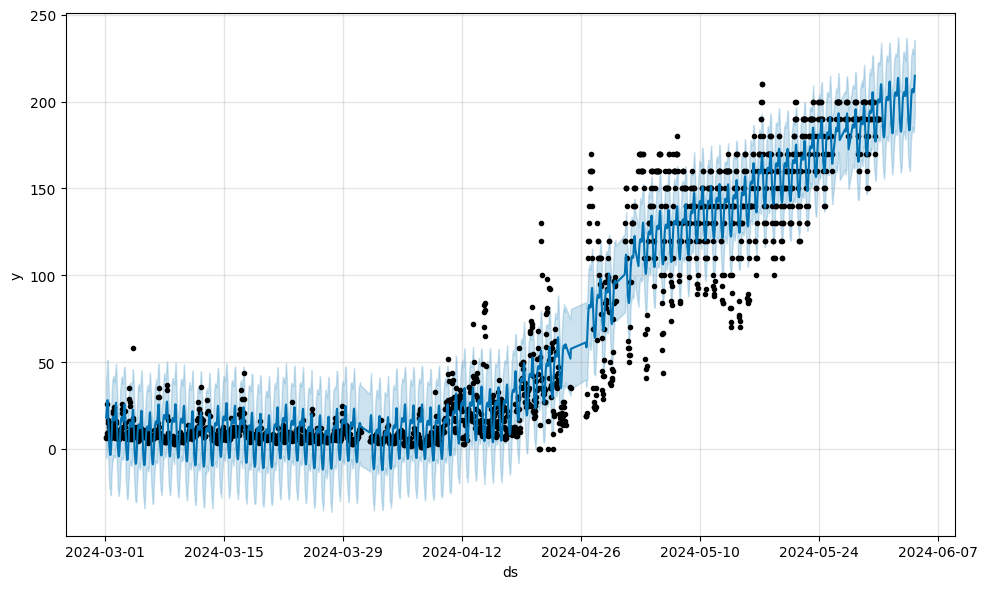

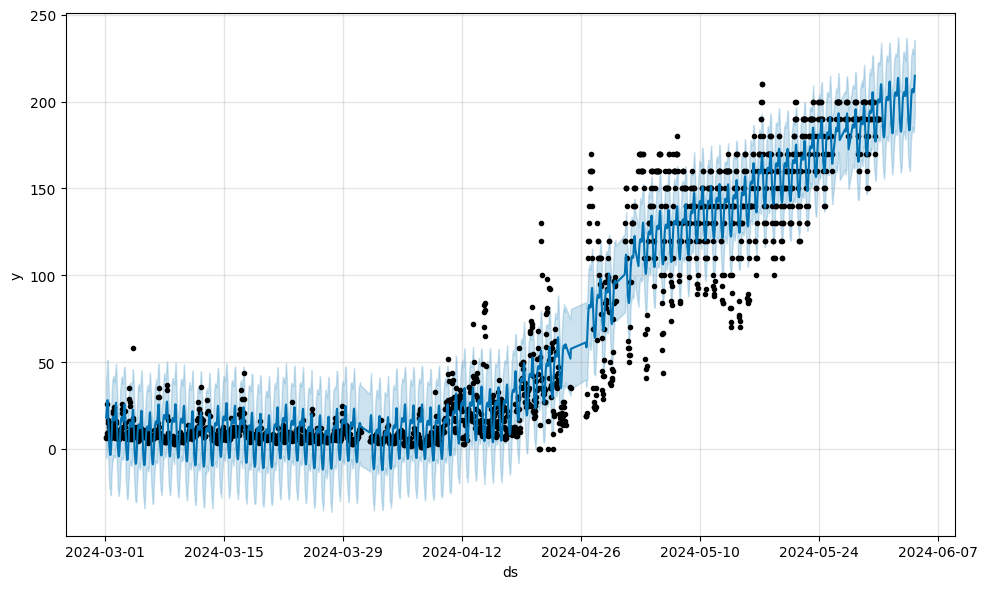

In [101]:
fig1 = model.plot(forecast)
fig1

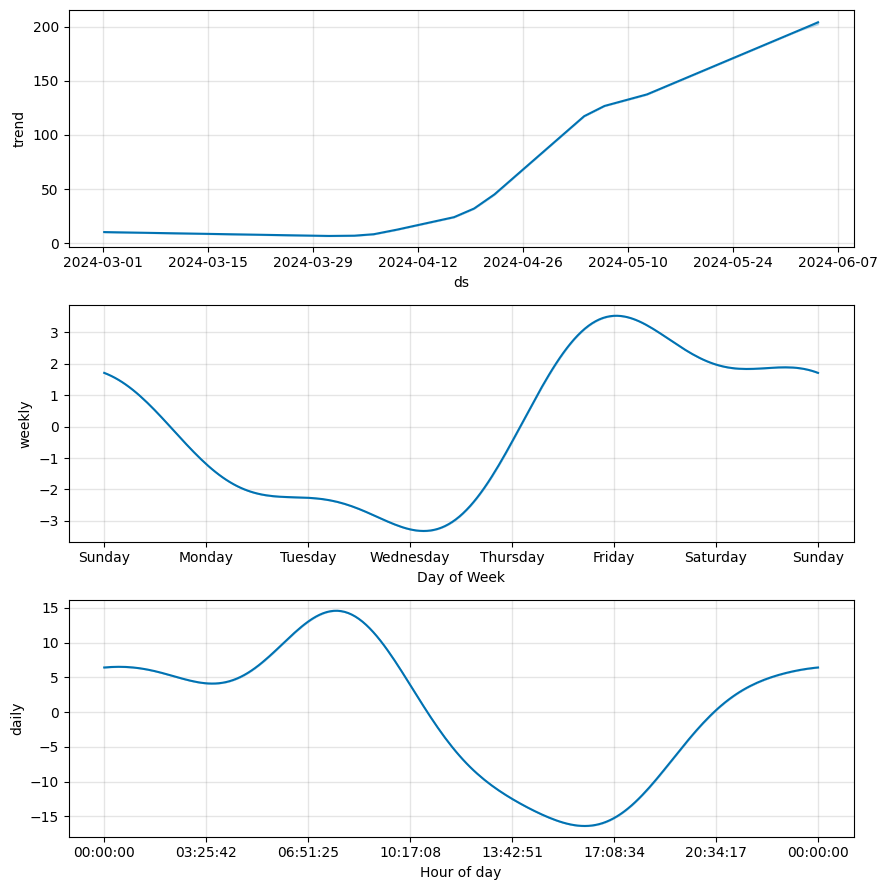

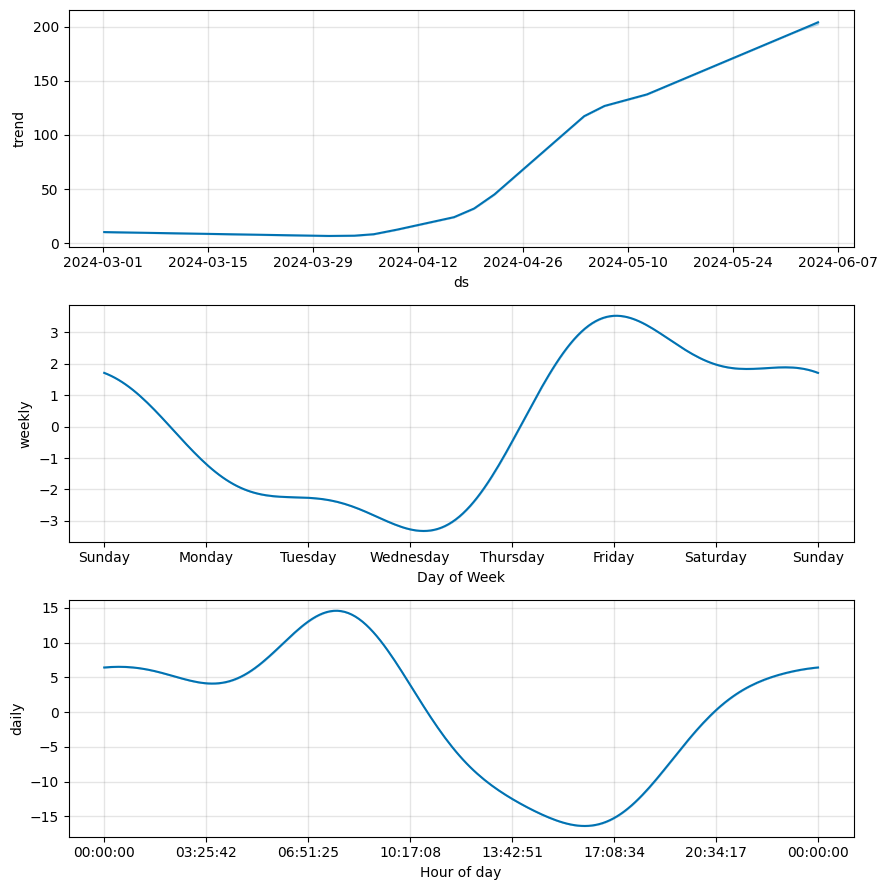

In [102]:
fig2 = model.plot_components(forecast)
fig2

In [103]:
#Comparison (Real vs Predicted)
data_df['ds'] = pd.to_datetime(data_df['ds'])
unknown_df = data_df.iloc[-100:]
data_df = data_df.iloc[:-100]

prophet = Prophet()
prophet.fit(data_df)

future_dates = prophet.make_future_dataframe(periods = 100, freq = 'H')
predictions = prophet.predict(future_dates)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurgqeg6v/4uru2lfz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurgqeg6v/mc_je5vk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90827', 'data', 'file=/tmp/tmpurgqeg6v/4uru2lfz.json', 'init=/tmp/tmpurgqeg6v/mc_je5vk.json', 'output', 'file=/tmp/tmpurgqeg6v/prophet_model7rhqg522/prophet_model-20240726115755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:57:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [104]:
unknown_df.tail()

,ds,y
2006,2024-05-30 22:00:00,190.0
2007,2024-05-30 23:00:00,190.0
2008,2024-05-31 00:00:00,190.0
2009,2024-05-31 02:00:00,190.0
2010,2024-05-31 03:00:00,190.0


In [105]:
data_df.tail()

,ds,y
1906,2024-05-25 06:00:00,190.0
1907,2024-05-25 07:00:00,190.0
1908,2024-05-25 08:00:00,190.0
1909,2024-05-25 09:00:00,190.0
1910,2024-05-25 10:00:00,180.0


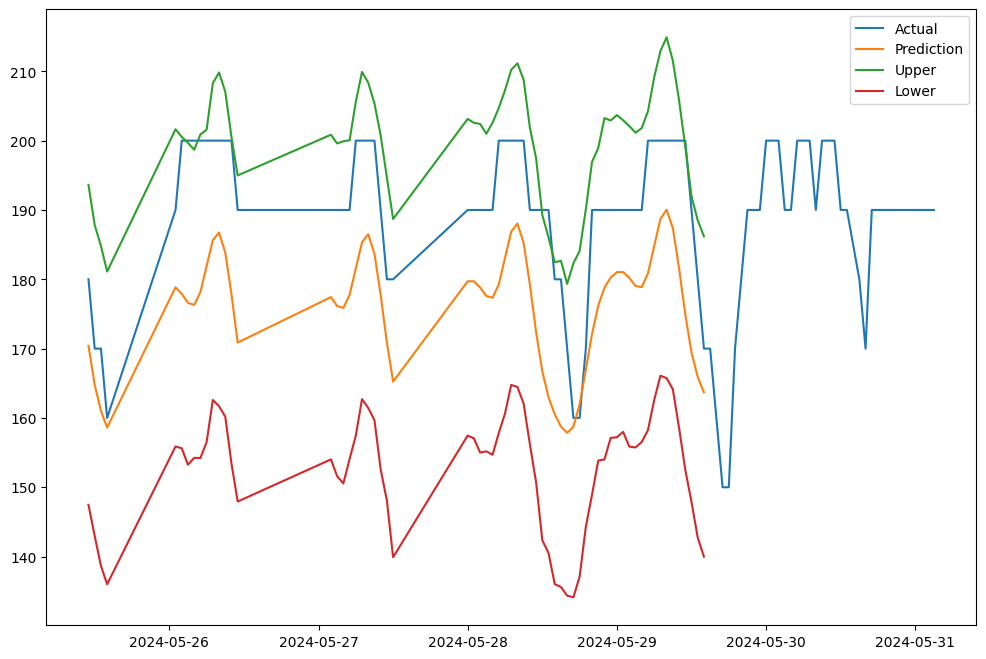

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

pred = predictions[predictions['ds'].isin(unknown_df['ds'])]

plt.plot(unknown_df['ds'],unknown_df['y'], label = "Actual")
plt.plot(pred['ds'],pred['yhat'], label = "Prediction")
plt.plot(pred['ds'],pred['yhat_upper'], label = "Upper")
plt.plot(pred['ds'],pred['yhat_lower'], label = "Lower")
plt.legend()
plt.show()